# Support Vector Machines: exercises

1. **Artificial datasets**

- Use `make_classifiers`, `make_circles`, `make_blobs` to generate artificial datasets of size 500 with 2 classes and 2 input features. Run SVC, measure error with cross validation and plot boundaries. The aim of this exercise is to obtain different datasets where:
    - The linear kernel is the best choice (smaller error)
    - The polynomial kernel is the best choice  (smaller error)
    - The radial basis kernel is the best choice  (smaller error)
        - Then produce datasets that prefer different values of gamma

2. **The linear kernel in C-SVC**

- Use the breast cancer dataset from `sklearn.datasets`. With the linear kernel, study how the number of support vectors changes with `C`. Plot the result.
- Now obtain the error (using cross validation) for the linear kernel for the value of `C`with the least support vectors you found.
- Plot the cross validated estimated generalization error against different values of `C`. Try to obtain a point with a minimum error value. What do you observe?
- Plot two lines against `C`: one with **cv error** and the other with $|SV|/N-1$, where $|SV|$ is the number of support vectors and $N$ is the number of training cases.
- How do you explain the result?
- Perform a similar study with other datasets

3. **Using other kernels**

- Use the Pima Indians dataset and minimize cv error using linear, radial basis and polynomial kernels with different values of `C`. Which combination gave the best value? Spoiler: the best kernel is not the linear (in my experiments), but there is only a tiny difference.
- Use the digits dataset from `sklearn.datasets`. Find the best kernel and C. Spoiler: the best error does not correspond to the smallest value of `C`. Is is not obtained with the linear kernel, either (in my experiments).


In [328]:
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.datasets import make_circles
from sklearn.model_selection import cross_val_score

import numpy as np


In [329]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=120, edgecolors='red', facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

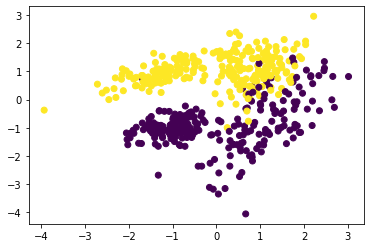

In [330]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=500,n_features=2,
                          n_clusters_per_class=2,
                          n_redundant=0,class_sep=1,
                          random_state=4)

plt.scatter(X[:,0],X[:,1],c=y)

In [331]:
model = SVC(kernel='poly',  C=100)
model.fit(X, y)
print(len(model.support_vectors_)) 
print(np.shape(X))
print(1-np.mean(cross_val_score(model,X,y)))

110
(500, 2)
0.07800000000000007


#SV = 134
Error = 0.062000000000000055


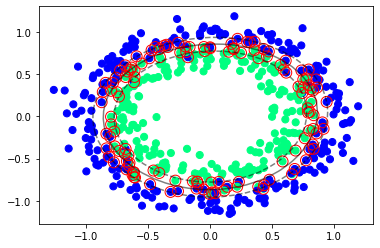

In [332]:
X, y = make_circles(500, factor=0.7, noise=.1, random_state=0)

model = SVC(kernel='rbf',C=10,gamma=0.34).fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plot_svc_decision_function(model, plot_support=True)
print("#SV =",len(model.support_vectors_))
print("Error =",1-np.mean(cross_val_score(model,X,y)))


In [333]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score
 

data = load_breast_cancer()
X = data.data
y = data.target

model = SVC(kernel='linear',  C=1)
model.fit(X, y)
print(len(model.support_vectors_)) 
print(np.shape(X))
print(1-np.mean(cross_val_score(model,X,y)))
print(model.gamma)

57
(569, 30)
0.054463592609843126
scale


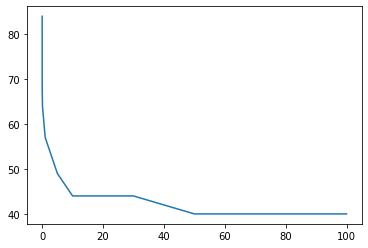

In [85]:
Cvec=[0.001,0.01,0.1,1,5,10,15,20,30, 40, 50, 60,70,80,90,100]
import matplotlib.pyplot as plt

def sv(C, kernel='linear'):
    model = SVC(kernel=kernel,  C=C)
    model.fit(X, y)
    return(len(model.support_vectors_))

svvec=list(map(sv,Cvec))
plt.plot(Cvec,svvec);

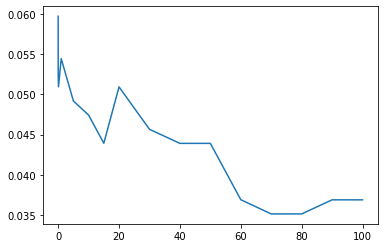

In [86]:
def cv_err(C, kernel='linear'):
    model = SVC(kernel=kernel,  C=C)
    return(1-np.mean(cross_val_score(model,X,y)))

errvec=list(map(cv_err,Cvec))
plt.plot(Cvec,errvec);

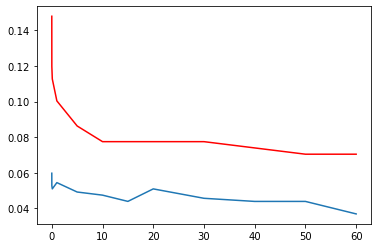

In [84]:
plt.plot(Cvec,errvec)
plt.plot(Cvec,np.array(svvec)/568,color='red');

In [87]:
errvec

[0.05974227604409266,
 0.05270920664493095,
 0.050954820680018664,
 0.054463592609843126,
 0.049184909175593816,
 0.04743052321068153,
 0.04392175128085718,
 0.0509392951405061,
 0.04566061170625679,
 0.04390622574134451,
 0.04390622574134451,
 0.03688868188169536,
 0.035118770377270514,
 0.035118770377270514,
 0.03687315634218291,
 0.03687315634218291]

In [98]:
import pandas as pd

data=pd.read_csv('../Problems/Pima-Indians/diabetes.csv')
#data=data.dropna()
X=np.array(data.drop('Outcome',1))
y=np.array(data['Outcome'])

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [141]:

model = SVC(kernel='poly',  C=25)
model.fit(X, y)

print(len(model.support_vectors_)) 
print(np.shape(X))
print(1-np.mean(cross_val_score(model,X,y)))
print(model.gamma)

# linear
#C,SV,err
#1,400,0.23
#10,398,0.233

# rbf
#10,416, 0.2395

#poly
#25,399,0.2317


399
(768, 8)
0.23177998472116124
scale


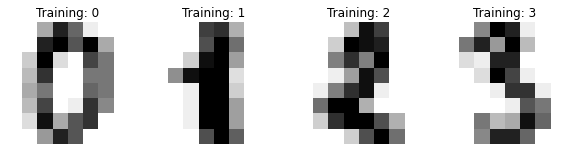

In [212]:
from sklearn.datasets import load_digits

digits = load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

In [217]:
X = digits.data
y = digits.target

model = SVC(kernel='rbf',  C=1, gamma=0.001)
model.fit(X, y)
print(len(model.support_vectors_)) 
print(np.shape(X))
print(1-np.mean(cross_val_score(model,X,y)))

# poly
# C,SV,err
# 1,525,0.0295

# linear
# 0.001,588,0.0489
# 10, 436, 0.0523

# rbf
# 10, 640, 0.0261


812
(1797, 64)
0.027813370473537602
